Projet final en Data Analysis
Apprenant: Fidel KPOGHOMOU
Email: kpoghomoufidel@eguifep.com
Années: 2025

# Chargement des packages

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Importer les données

In [208]:
db = pd.read_csv("Projet 2 dataset Student_Performance.csv")
db.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# 2. EDA (Exploratory Data Analysi) Analyse et exploration de donnees

In [209]:
## Nombre de ligne et de colone:
lc = db.shape

## Types de variables et leur nombre
typ = db.dtypes.value_counts()
print(lc,typ)

#Ci dessus, nous avons 10000 étudiants, renseignées sur 6 variables différentes.
# Quatre (4) types d'objets ont ete identifies dont 4 variables de type int64, 1 variable de type object et 1 de type float64


(10000, 6) int64      4
object     1
float64    1
Name: count, dtype: int64


In [210]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [211]:
# Vérification des valeurs manquantes
missing_values = db.isnull().sum()

# Statistiques descriptives du dataset
summary_statistics = db.describe()

missing_values, summary_statistics


(Hours Studied                       0
 Previous Scores                     0
 Extracurricular Activities          0
 Sleep Hours                         0
 Sample Question Papers Practiced    0
 Performance Index                   0
 dtype: int64,
        Hours Studied  Previous Scores   Sleep Hours  \
 count   10000.000000     10000.000000  10000.000000   
 mean        4.992900        69.445700      6.530600   
 std         2.589309        17.343152      1.695863   
 min         1.000000        40.000000      4.000000   
 25%         3.000000        54.000000      5.000000   
 50%         5.000000        69.000000      7.000000   
 75%         7.000000        85.000000      8.000000   
 max         9.000000        99.000000      9.000000   
 
        Sample Question Papers Practiced  Performance Index  
 count                      10000.000000       10000.000000  
 mean                           4.583300          55.224800  
 std                            2.867348          19.212558

In [212]:
# Liste des colonnes numériques à analyser
numeric_columns = db.drop(["Extracurricular Activities"], axis=1)

## Distribution des variables

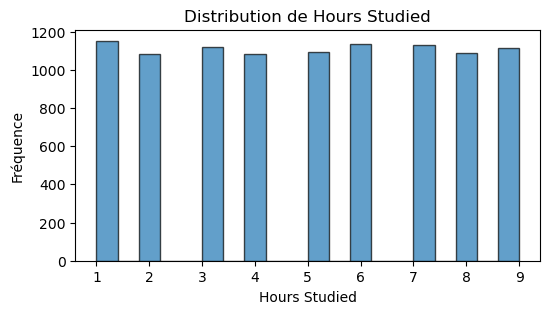

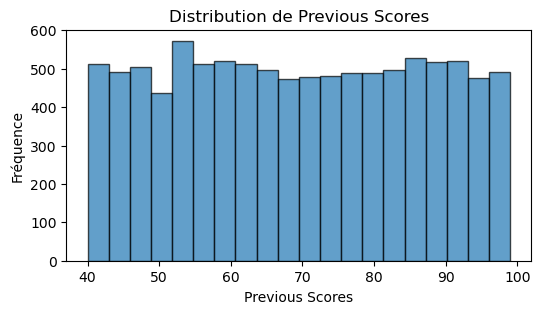

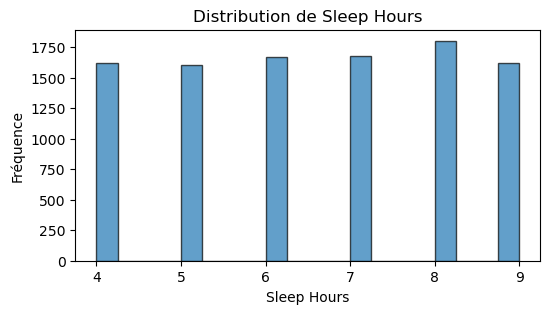

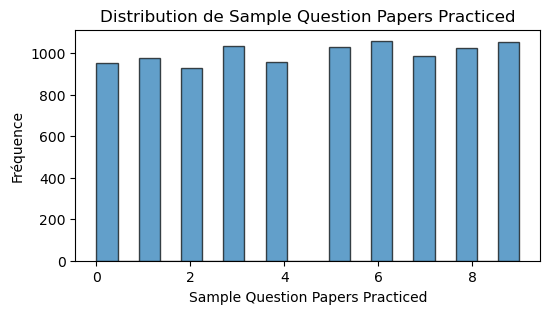

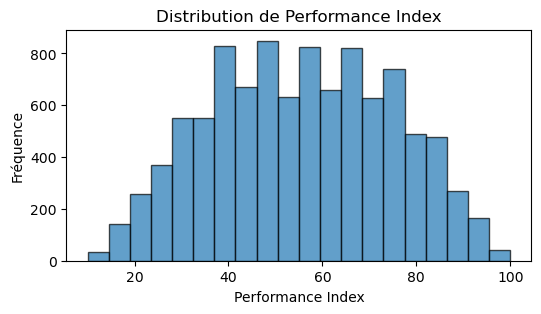

In [213]:
# Histogrammes des distributions
for column in numeric_columns:
    plt.figure(figsize=(6, 3))
    plt.hist(db[column], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f"Distribution de {column}")
    plt.xlabel(column)
    plt.ylabel("Fréquence")
    plt.show()

## Vérification des valeurs aberrantes à l'aide de visualisations.

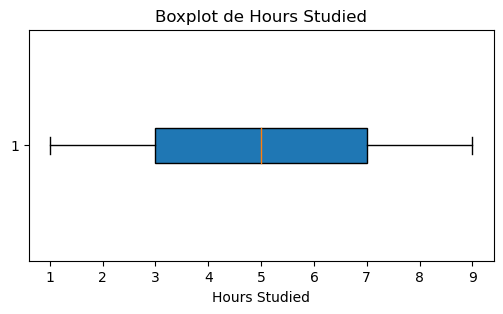

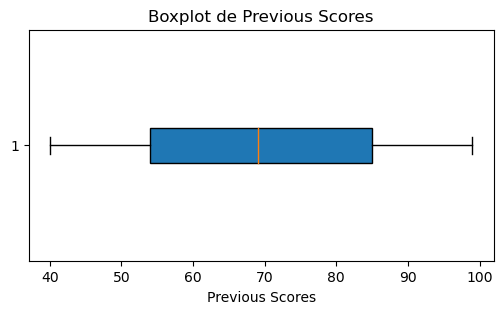

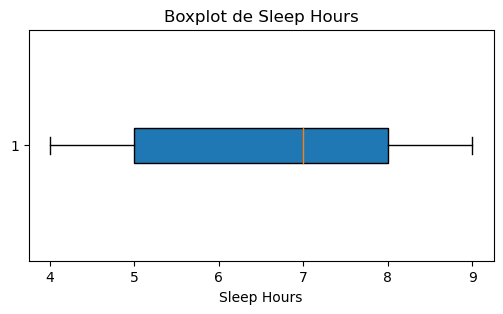

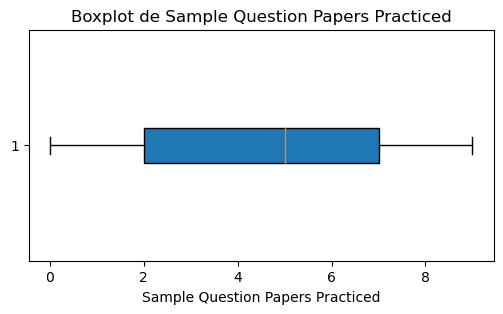

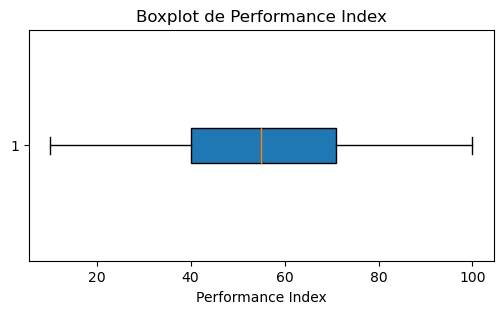

In [214]:
# Boxplots pour détecter les valeurs aberrantes
for column in numeric_columns:
    plt.figure(figsize=(6, 3))
    plt.boxplot(db[column], vert=False, patch_artist=True)
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)
    plt.show()

## Étude de la corrélation entre les variables pour voir les relations qui influencent la performance.

### Calcul et affichage de la matrice de corrélation

In [216]:
# Encodage de la variable "Extracurricular Activities" (Oui = 1, Non = 0)
db["Extracurricular Activities"] = db["Extracurricular Activities"].map({"Yes": 1, "No": 0})

# Calcul de la matrice de corrélation
correlation_matrix = db.corr()

# Afficher la matrice de corrélation
correlation_matrix


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


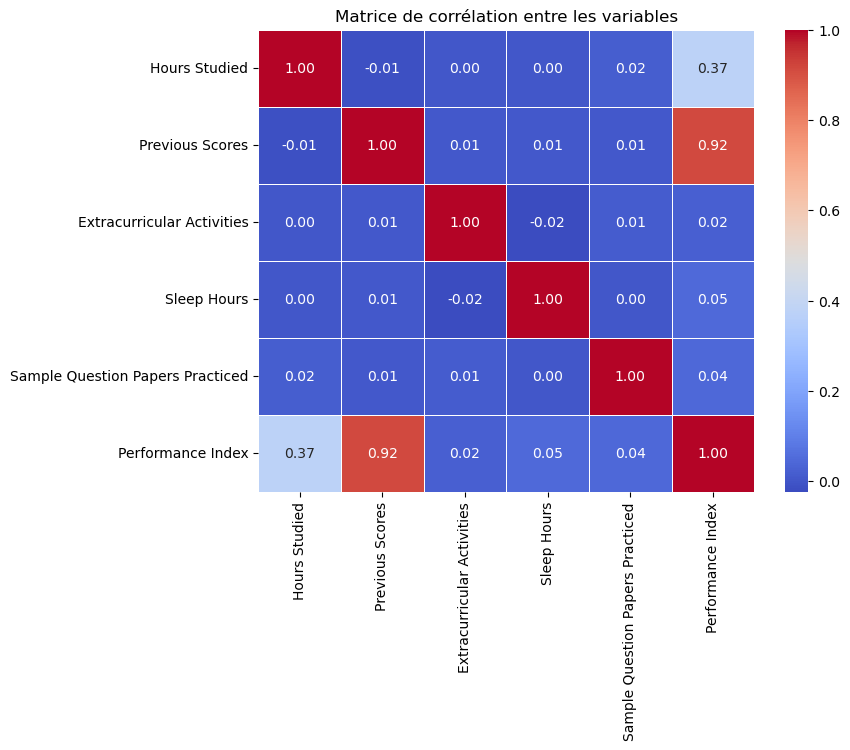

In [217]:
# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre les variables")
plt.savefig("Matrice de corrélation2.png", dpi=250, bbox_inches='tight')
plt.show()

## Nuage de points (Scatter Plot)

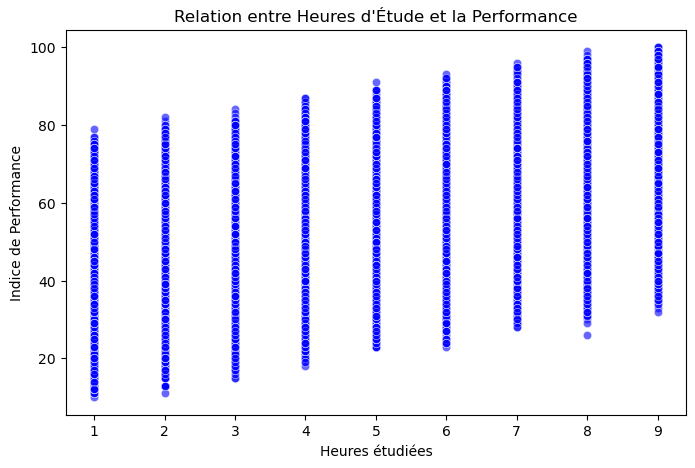

In [219]:
# Relation entre "Hours Studied" et "Performance Index"
plt.figure(figsize=(8,5))
sns.scatterplot(x=db["Hours Studied"], y=db["Performance Index"], alpha=0.6, color="blue")
plt.title("Relation entre Heures d'Étude et la Performance")
plt.xlabel("Heures étudiées")
plt.ylabel("Indice de Performance")
plt.show()

## Relations par paires dans l'ensemble de données (Pairplot)

C:\Users\FIDEL KPOGHOMOU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


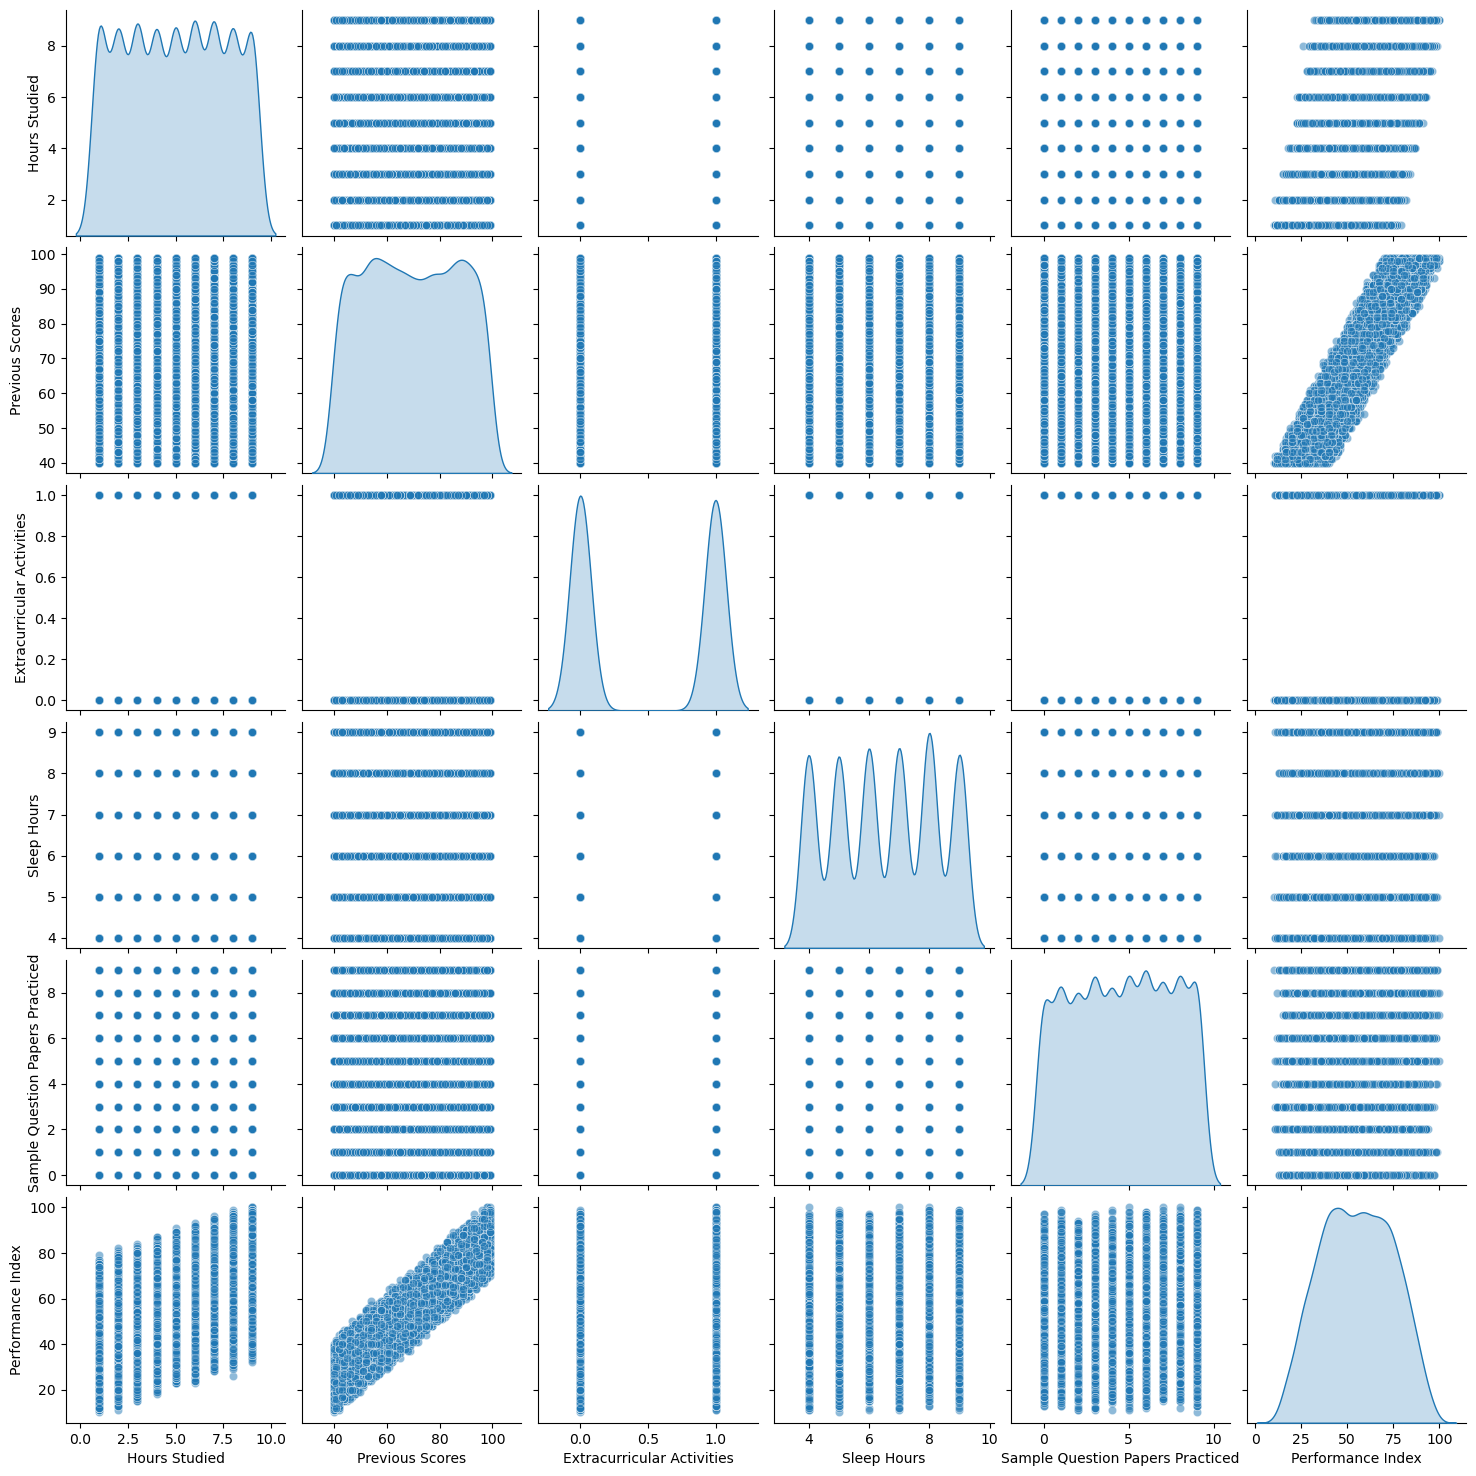

In [221]:
# Pairplot (Vue globale des relations entre toutes les variables)
sns.pairplot(db, diag_kind="kde", plot_kws={"alpha": 0.5})
plt.savefig("Relations par paires dans l'ensemble de données.png", dpi=250, bbox_inches='tight')
plt.show()


## Barplot des corrélations

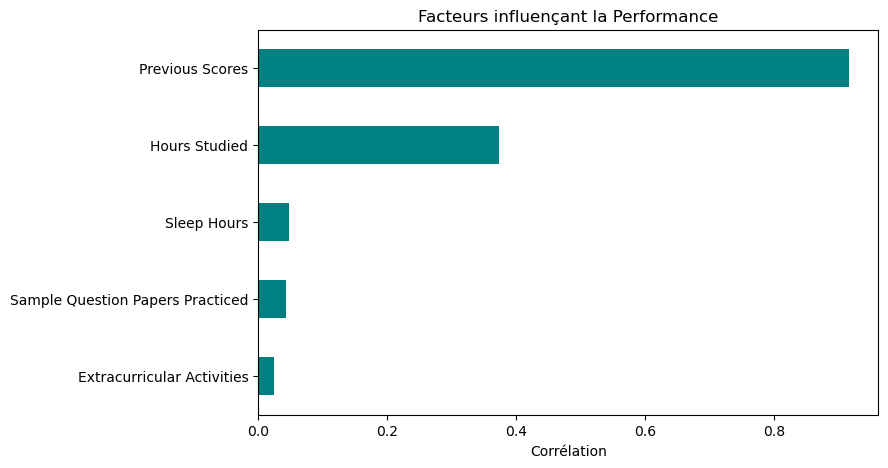

In [223]:
# Calculer la corrélation avec la performance
correlation_performance = db.corr()["Performance Index"].drop("Performance Index")

# Afficher un barplot des corrélations
plt.figure(figsize=(8, 5))
correlation_performance.sort_values().plot(kind="barh", color="teal")
plt.title("Facteurs influençant la Performance")
plt.xlabel("Corrélation")
plt.savefig("Facteurs influençant la Performance.png", dpi=250, bbox_inches='tight')
plt.show()


## Diagramme en Réseau (Graph Correlation)

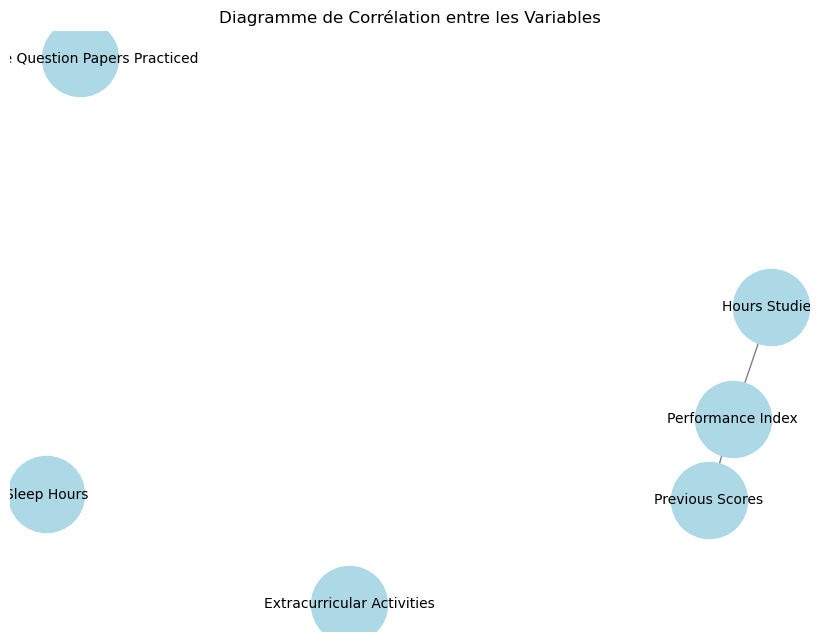

In [169]:
# Création du graphe
plt.figure(figsize=(8, 6))
G = nx.Graph()

# Ajout des nœuds (les variables)
for var in db.columns:
    G.add_node(var)

# Ajouter les liens selon la matrice de corrélation
corr_matrix = db.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.3:  # Seulement les relations significatives
            G.add_edge(corr_matrix.columns[i], corr_matrix.columns[j], weight=corr_matrix.iloc[i, j])

# Positionnement des nœuds
pos = nx.spring_layout(G)

# Dessiner le graphe
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=3000, font_size=10)
plt.title("Diagramme de Corrélation entre les Variables")
plt.show()


### Visualiser la performance en fonction de l'activitées Extrascolaire

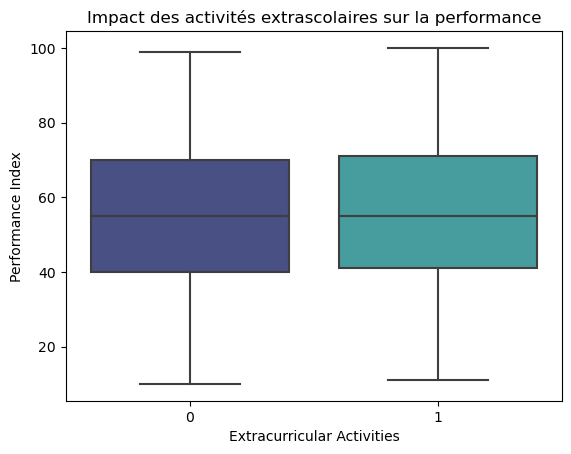

In [224]:
sns.boxplot(x="Extracurricular Activities", y="Performance Index", data=db, palette="mako")
plt.title("Impact des activités extrascolaires sur la performance")
plt.show()

# 3. Pre-Processing

## Identification et suppression des valeurs aberantes (outliers)

In [234]:
def outlierab(db, columns):
    Q1 = db[columns].quantile(0.25)
    Q3 = db[columns].quantile(0.75)
    IQR = Q3 - Q1
    Borne_Inf = Q1 - 1.5*IQR
    Borne_Sup = Q3 + 1.5*IQR
    return  db[(db[columns]>Borne_Inf) | (db[columns]<Borne_Sup)]

In [236]:
db = outlierab(db,'Hours Studied')
db = outlierab(db,'Previous Scores')
db = outlierab(db,'Sleep Hours')
db = outlierab(db,'Sample Question Papers Practiced')

## Transformation des données :

In [143]:
# Séparation des variables indépendantes (X) et dépendante (y)
X = db.drop(columns=["Performance Index"])
y = db["Performance Index"]

# Normalisation des variables pour certains modèles
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division en ensemble d'entraînement et de test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Modelling

## Construction des modèles prédictif pour estimer la performance des étudiants.

                                  MAE      RMSE        R²
Régression Linéaire          1.611121  2.020552  0.988983
Random Forest                1.814721  2.271308  0.986079
Gradient Boosting (XGBoost)  1.657845  2.089171  0.988222
K-Nearest Neighbors (KNN)    1.951100  2.437281  0.983970


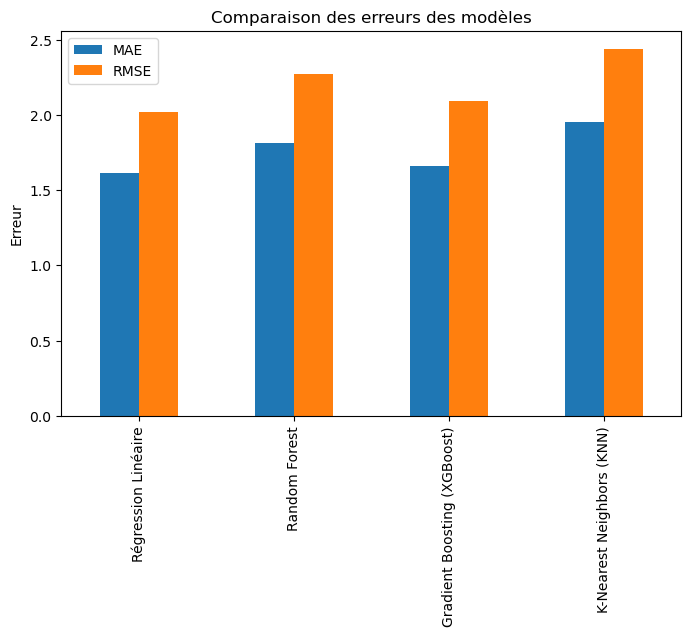

In [241]:
# Définir les modèles à tester
models = {
    "Régression Linéaire": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting (XGBoost)": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor(n_neighbors=5)
}

# Entraînement et évaluation de chaque modèle
results = {}

for name, model in models.items():
    # Entraînement du modèle
    model.fit(X_train, y_train)
    
    # Prédictions
    y_pred = model.predict(X_test)
    
    # Calcul des métriques de performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # Stocker les résultats
    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

# Affichage des résultats sous forme de DataFrame
df_results = pd.DataFrame(results).T
print(df_results)

# Affichage des résultats sous forme de graphique
df_results[["MAE", "RMSE"]].plot(kind="bar", figsize=(8, 5), title="Comparaison des erreurs des modèles")
plt.ylabel("Erreur")
plt.savefig("Comparaison des erreurs des modèles.png", dpi=300, bbox_inches='tight')
plt.show()

In [239]:
# Choix du meilleur modèle
best_model = LinearRegression()
best_model.fit(X_train, y_train)

# Importance des variables
feature_imp = best_model.singular_
#feature_importance = best_model.feature_importances_
features = db.drop(columns=["Performance Index"]).columns


In [240]:
# Séparation des variables indépendantes (X) et dépendante (y)
#X = db.drop(columns=["Performance Index"])
#y = db["Performance Index"]

# Division en ensemble d'entraînement et de test (80% - 20%)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(1.6111213463123046, 2.020551508505006, 0.9889832909573145)

# Développement d'une interface utilisateur .